<a href="https://colab.research.google.com/github/Harbhajan-Kaur/final_project_Harbhajan_Kaur/blob/main/Kaggle_import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle #install kaggle library

In [2]:
from google.colab import drive
drive.mount('/content/drive')   #connect to google drive

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle #directory name kaggle

In [4]:
!cp /content/drive/MyDrive/kaggle_API/kaggle.json ~/.kaggle/  #copy token to kaggle(dir)

In [5]:
! chmod 600 ~/.kaggle/kaggle.json #only owner has read and write permission

In [6]:
! kaggle datasets download akashshingha850/mrl-eye-dataset


Dataset URL: https://www.kaggle.com/datasets/akashshingha850/mrl-eye-dataset
License(s): MIT


In [7]:
! unzip mrl-eye-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/val/sleepy/s0013_02688_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02689_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02692_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02693_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02694_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02700_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02710_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02713_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02716_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02726_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02728_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02738_0_1_0_1_0_01.png  
  inflating: data/val/sleepy/s0013_02748_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02755_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02778_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02806_0_1_0_0_

In [8]:
# Define paths
train_dir = "/content/data/train"
val_dir = "/content/data/val"
test_dir = "/content/data/test"

In [9]:
import os #directory operations
import numpy as np #array and matrices
import matplotlib.pyplot as plt #visualization
import tensorflow as tf #lib to build newral networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator #agumentation(fliping,rotating the images)
from tensorflow.keras.models import Sequential # stack of layers where each layer has one input and output
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout #cnn related
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #earlystoping-stoping training if improvement not made,.............

In [22]:
import cv2

In [23]:
img_array=cv2.imread("/content/data/train/awake/s0001_01842_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)

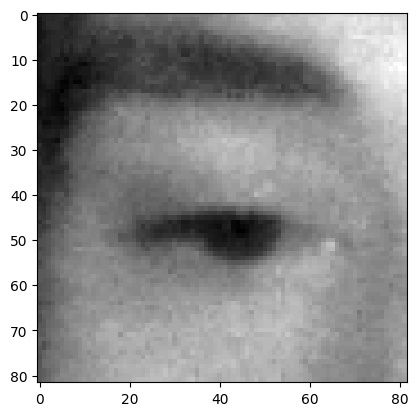

In [24]:
plt.imshow(img_array,cmap="gray")

In [21]:


# Load the image
image_path = "/content/data/train/awake/s0001_01842_0_0_1_0_0_01.png"
img = cv2.imread(image_path)

# Get dimensions
height, width, channels = img.shape
print(f"Image size: {width} x {height}, Channels: {channels}")


Image size: 82 x 82, Channels: 3


In [28]:
img_array=cv2.imread("/content/data/test/sleepy/s0001_00085_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

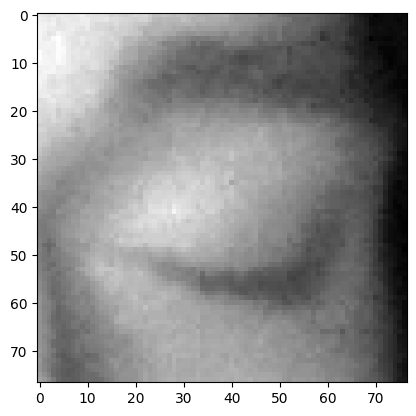

In [29]:
plt.imshow(img_array,cmap="gray")

In [30]:

# Load the image
image_path = "/content/data/train/awake/s0001_01842_0_0_1_0_0_01.png"
img = cv2.imread(image_path)

# Get dimensions
height, width, channels = img.shape
print(f"Image size: {width} x {height}, Channels: {channels}")

Image size: 82 x 82, Channels: 3


In [52]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, #rescale pixels from 0to 1
    rotation_range=20, #rotate image to 20 degree
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'    #agumentaion is only applied to training dataset whereas and rescaling is done in both traing and test dataset
)

val_datagen = ImageDataGenerator(rescale=1./255)     # pixel size 0 t0 1
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  #resize all the images in
    batch_size=32,  #loads images in batches of 32..memory efficency
    class_mode='binary'     #binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 50937 images belonging to 2 classes.
Found 16980 images belonging to 2 classes.
Found 16981 images belonging to 2 classes.


In [31]:
# Check image dimensions
print(f"Image shape: {train_generator.image_shape}") #flow_from_directory() loads images in RGB mode (even if the images are grayscale)

Image shape: (80, 80, 3)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter #counts occurance

# Function to plot class distribution
def plot_class_distribution(generator, title): #generator-dataset
    labels = generator.classes                                                           #extract classes
    class_counts = Counter(labels)
    class_names = list(generator.class_indices.keys()) #dictionary ki keys

    plt.figure(figsize=(8, 4))
    sns.barplot(x=class_names, y=[class_counts[i] for i in range(len(class_names))])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Plot class distribution for train set
plot_class_distribution(train_generator, 'Training Set Class Distribution')

In [ ]:
#import matplotlib.pyplot as plt #chatgpt
import seaborn as sns
from collections import Counter

# Function to plot class distribution with colors
def plot_class_distribution(generator, title):
    labels = generator.classes  # Extract class labels
    class_counts = Counter(labels)
    class_names = list(generator.class_indices.keys())  # Get class names

    plt.figure(figsize=(8, 4))
    sns.set_style("whitegrid")  # Improve background style

    # Use a colorful palette
    sns.barplot(x=class_names, y=[class_counts[i] for i in class_counts.keys()],
                palette="husl", edgecolor="black")  # 'husl' gives vibrant colors

    plt.title(title, fontsize=14, fontweight='bold', color='darkblue')  # Title Styling
    plt.xlabel('Class', fontsize=12, fontweight='bold', color='darkred')
    plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkgreen')

    plt.xticks(rotation=20, fontsize=10, color='purple')  # Rotate x-axis labels
    plt.yticks(fontsize=10, color='brown')

    plt.show()

# Plot class distribution for train set
plot_class_distribution(train_generator, 'Training Set Class Distribution')


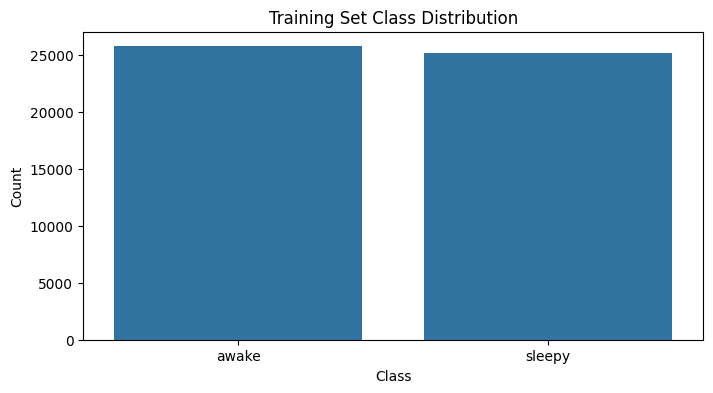

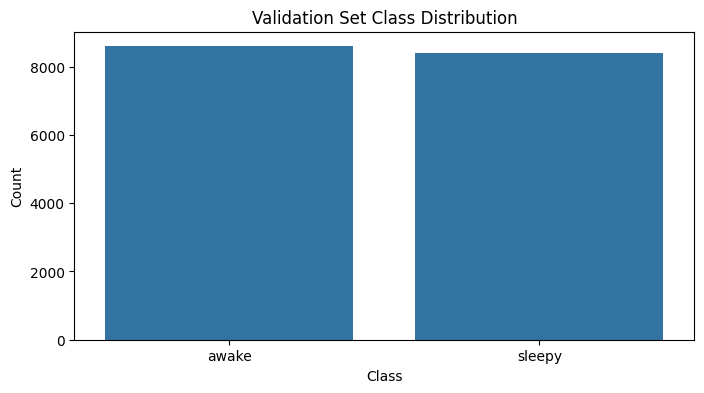

In [13]:
# Plot class distribution for val set
plot_class_distribution(val_generator, 'Validation Set Class Distribution')

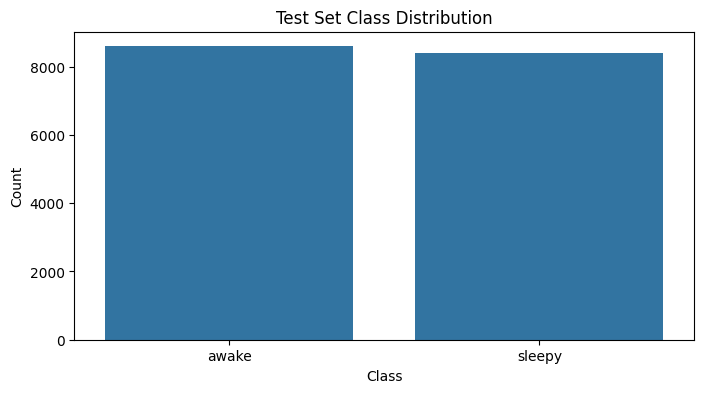

In [14]:
# Plot class distribution for test set
plot_class_distribution(test_generator, 'Test Set Class Distribution')

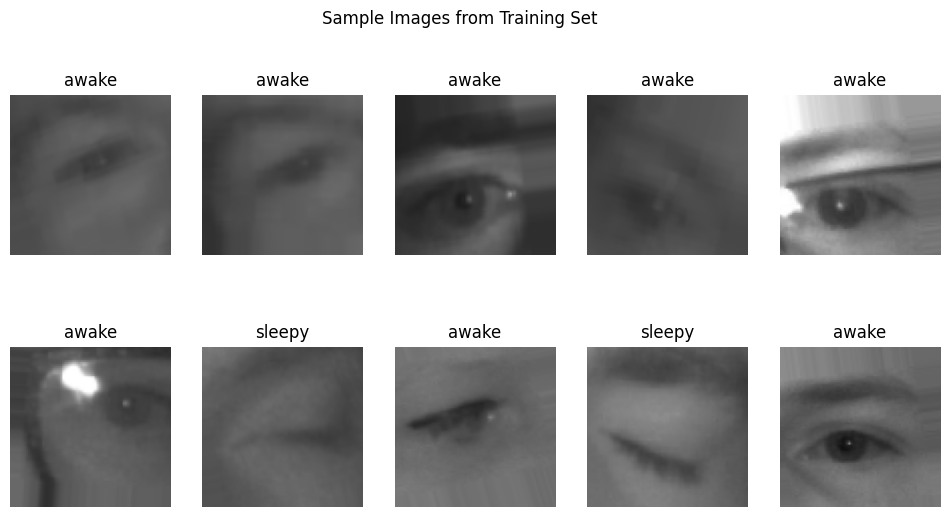

In [16]:
# Function to plot sample images
import numpy as np
import matplotlib.pyplot as plt

def plot_sample_images(generator, title):
    images, labels = next(generator)
    class_names = list(generator.class_indices.keys())

    # Convert one-hot encoded labels to class indices if necessary
    if labels.ndim > 1:  # Check if labels are one-hot encoded
        labels = np.argmax(labels, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])  # Convert to int
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Call the function
plot_sample_images(train_generator, 'Sample Images from Training Set')


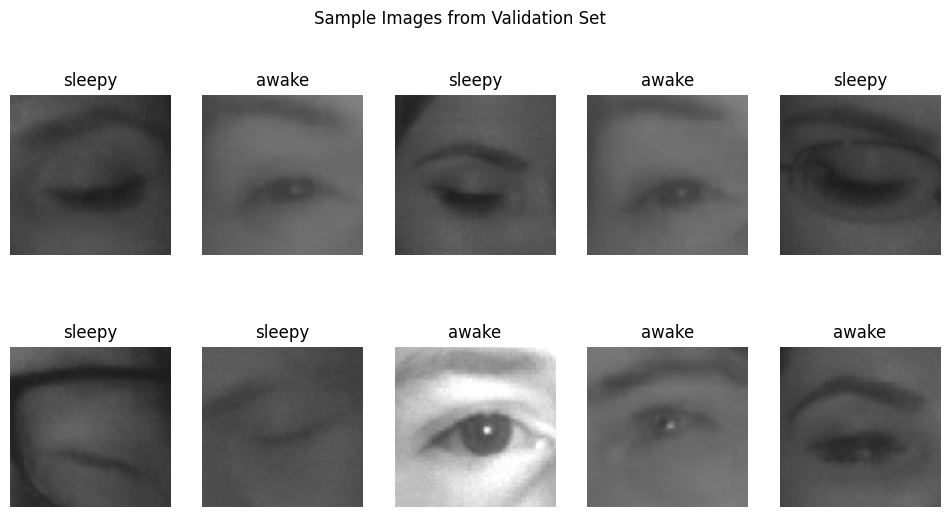

In [17]:
# Plot sample images from  val set
plot_sample_images(val_generator, 'Sample Images from Validation Set')

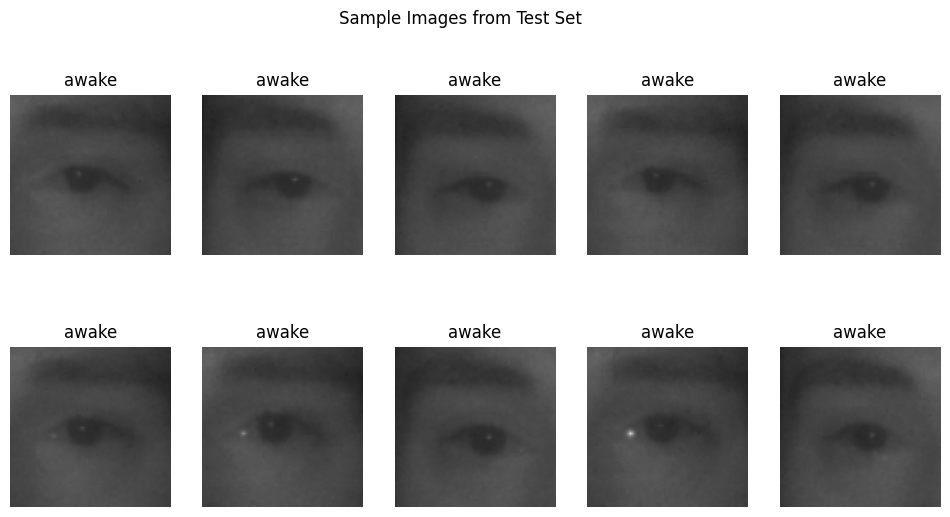

In [18]:
# Plot sample images from test set
plot_sample_images(test_generator, 'Sample Images from Test Set')

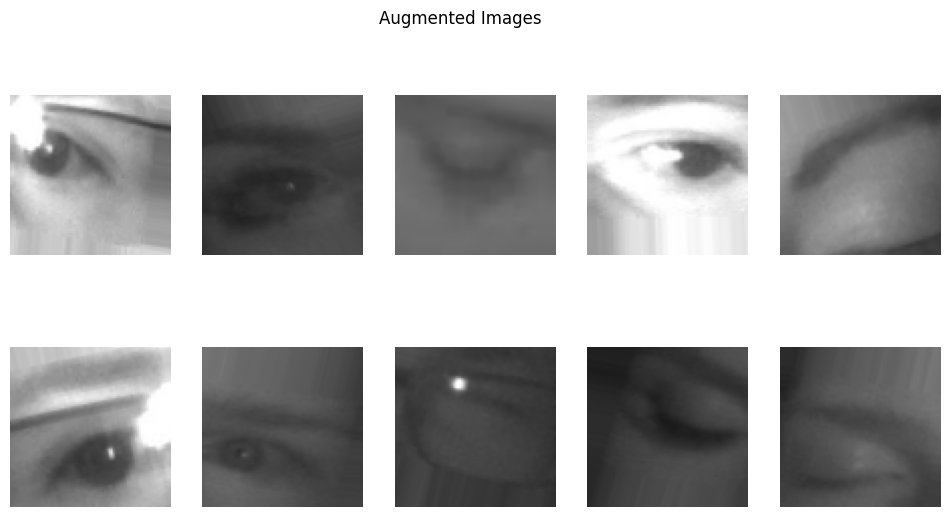

In [20]:
# Visualize data augmentation effects
augmented_images, _ = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()

In [32]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
#transfer learning-InceptionV3
base_model = InceptionV3(include_top=False, weights= 'imagenet', input_tensor=Input(shape=(224,224,3)))
head_model = base_model.output
head_model = Flatten()(head_model)
head_model = Dense(64, activation='relu')(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(1,activation= 'sigmoid')(head_model)  #1 neuron ayega?

model = Model(inputs=base_model.input, outputs= head_model)
for layer in base_model.layers:
  layer.trainable =False

NameError: name 'InceptionV3' is not defined

In [54]:
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_282 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_282   │ (None, 111, 111, 32)   │             96 │ conv2d_282[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_282            │ (None, 111, 111, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_283 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_282[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_283   │ (None, 109, 109, 32)   │             96 │ conv2d_283[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_283            │ (None, 109, 109, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_284 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_283[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_284   │ (None, 109, 109, 64)   │            192 │ conv2d_284[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_284            │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 54, 54, 64)     │              0 │ activation_284[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_285 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_285   │ (None, 54, 54, 80)     │            240 │ conv2d_285[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_285            │ (None, 54, 54, 80)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_286 (Conv2D)  

 Total params: 25,079,713 (95.67 MB)

 Trainable params: 3,276,929 (12.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [56]:


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
learning_rate = ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=3)

In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint,learning_rate])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_945']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


1592/1592 ━━━━━━━━━━━━━━━━━━━━ 677s 416ms/step - accuracy: 0.8853 - loss: 0.4227 - val_accuracy: 0.9470 - val_loss: 0.1282 - learning_rate: 0.0010
Epoch 2/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 649s 408ms/step - accuracy: 0.9364 - loss: 0.1790 - val_accuracy: 0.9654 - val_loss: 0.1086 - learning_rate: 0.0010
Epoch 3/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 655s 411ms/step - accuracy: 0.9389 - loss: 0.1617 - val_accuracy: 0.9673 - val_loss: 0.0879 - learning_rate: 0.0010
Epoch 4/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 647s 407ms/step - accuracy: 0.9368 - loss: 0.1583 - val_accuracy: 0.9685 - val_loss: 0.0820 - learning_rate: 0.0010
Epoch 5/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 689s 411ms/step - accuracy: 0.9427 - loss: 0.1497 - val_accuracy: 0.9721 - val_loss: 0.0773 - learning_rate: 0.0010


In [1]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


NameError: name 'model' is not defined

NameError: name 'history' is not defined

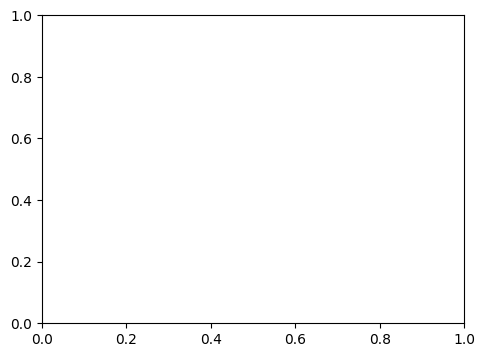

In [45]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
# Load Pretrained VGG16 Model (Without Top Layers)
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
# Freeze VGG16 Layers (So they don't get updated during training)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add Custom Classification Head
head_model = base_model.output
head_model = Flatten()(head_model)  # Flatten convolutional features
head_model = Dense(128, activation='relu')(head_model)  # Fully connected layer
head_model = Dropout(0.5)(head_model)  # Dropout for regularization
head_model = Dense(1, activation='sigmoid')(head_model)  # Output layer (2 classes)

In [ ]:
# Create Final Model
model = Model(inputs=base_model.input, outputs=head_model)

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Print Model Summary
model.summary()

In [ ]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_vgg16_model.keras', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1)


In [ ]:
# Train Model
history= model.fit(train_generator,
          validation_data=val_generator,
          epochs=10,
          callbacks=[early_stopping, model_checkpoint, reduce_lr])


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [ ]:
# Load Pretrained ResNet50 Model (Without Top Layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))


In [ ]:
# Freeze ResNet50 Layers (So they don't get updated during training)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add Custom Classification Head
head_model = base_model.output
head_model = Flatten()(head_model)  # Flatten convolutional features
head_model = Dense(128, activation='relu')(head_model)  # Fully connected layer
head_model = Dropout(0.5)(head_model)  # Dropout for regularization
head_model = Dense(1, activation='sigmoid')(head_model)  # Output layer (2 classes)

In [ ]:
# Create Final Model
model = Model(inputs=base_model.input, outputs=head_model)


In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print Model Summary
model.summary()

In [ ]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_resnet_model.keras', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1)

In [ ]:
# Train Model
history = model.fit(train_generator,
          validation_data=val_generator,
          epochs=10,
          callbacks=[early_stopping, model_checkpoint, reduce_lr])

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()